In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('TRAIN.csv')
train.head()

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36


In [3]:
train.shape

(8000, 5)

In [4]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [8]:
train.duplicated().sum()

31

In [9]:
train = train.drop_duplicates(keep = 'first')
train.shape

(7969, 5)

In [5]:
test = pd.read_csv('TEST.csv')
test.head()

,AT,V,AP,RH
0,11.55,40.60,1014.44,87.06
1,6.61,38.91,1015.77,92.31
2,16.97,42.86,1013.92,74.80
3,21.90,57.76,1017.45,66.89
4,9.73,40.22,1011.48,87.88


In [6]:
test.shape

(1568, 4)

In [7]:
test.isnull().sum()

AT    0
V     0
AP    0
RH    0
dtype: int64

In [10]:
train['AP/V'] = train['AP']/train['V']
train['AT-RH'] = train['AT']-train['RH']
train['Dew_Point'] = train['AT']-((100-train['RH'])/5)

In [11]:
test['AP/V'] = test['AP']/test['V']
test['AT-RH'] = test['AT']-test['RH']
test['Dew_Point'] = test['AT']-((100-test['RH'])/5)

In [12]:
train.head()

,AT,V,AP,RH,PE,AP/V,AT-RH,Dew_Point
0,22.85,60.29,1017.29,61.92,448.58,16.873279,-39.07,15.234
1,11.75,35.76,1018.99,57.92,473.01,28.495246,-46.17,3.334
2,12.24,44.90,1020.31,82.22,464.25,22.724053,-69.98,8.684
3,13.43,40.10,1015.82,87.90,471.77,25.332170,-74.47,11.010
4,4.65,35.19,1018.23,94.78,489.36,28.935209,-90.13,3.606


In [22]:
x = train.drop('PE', axis = 1)
y = train['PE']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1)

In [23]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)

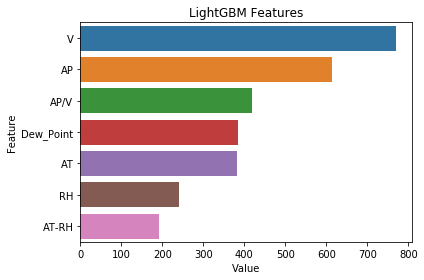

In [26]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:50], columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

3.464598703570929


In [13]:
x_train = train.drop('PE', axis = 1)
y_train = train['PE']
x_test = test

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({ 'Value': y_pred})
solution.to_csv('LGBM.csv')